## BMW SALES PREDICTION

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("bmw_global_sales_dataset.csv")

In [3]:
data.head()

,year,month,country,model,segment,engine_type,price_usd,marketing_spend_usd,dealership_count,fuel_price_usd,gdp_growth_percent,interest_rate_percent,competition_index,units_sold
0,2021,1,Australia,X1,SUV,Petrol,82234,315372,96,0.97,6.29,1.2,8,324
1,2018,8,Australia,i4,Sedan,Electric,82291,447798,234,0.97,6.29,1.2,7,556
2,2022,12,USA,5 Series,Electric,Hybrid,40594,259755,25,0.97,6.29,1.2,7,152
3,2019,11,Australia,i7,SUV,Electric,42371,323541,319,0.97,6.29,1.2,5,730
4,2021,12,Brazil,X5,SUV,Diesel,82315,482015,367,0.97,6.29,1.2,2,1156


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   year                   1000 non-null   int64  
 1   month                  1000 non-null   int64  
 2   country                1000 non-null   object 
 3   model                  1000 non-null   object 
 4   segment                1000 non-null   object 
 5   engine_type            1000 non-null   object 
 6   price_usd              1000 non-null   int64  
 7   marketing_spend_usd    1000 non-null   int64  
 8   dealership_count       1000 non-null   int64  
 9   fuel_price_usd         1000 non-null   float64
 10  gdp_growth_percent     1000 non-null   float64
 11  interest_rate_percent  1000 non-null   float64
 12  competition_index      1000 non-null   int64  
 13  units_sold             1000 non-null   int64  
dtypes: float64(3), int64(7), object(4)
memory usage: 109.5+ K

In [5]:
data.describe

<bound method NDFrame.describe of      year  month    country     model   segment engine_type  price_usd  \
0    2021      1  Australia        X1       SUV      Petrol      82234   
1    2018      8  Australia        i4     Sedan    Electric      82291   
2    2022     12        USA  5 Series  Electric      Hybrid      40594   
3    2019     11  Australia        i7       SUV    Electric      42371   
4    2021     12     Brazil        X5       SUV      Diesel      82315   
..    ...    ...        ...       ...       ...         ...        ...   
995  2024     10         UK        i4     Sedan    Electric      64813   
996  2024      2      India  3 Series     Sedan      Petrol     119431   
997  2022      2     Brazil  5 Series       SUV    Electric     100679   
998  2016      1     Brazil        i7     Sedan      Hybrid      45681   
999  2023     10      China  7 Series     Sedan      Petrol     107903   

     marketing_spend_usd  dealership_count  fuel_price_usd  \
0              

In [6]:
data.isnull().sum()

year                     0
month                    0
country                  0
model                    0
segment                  0
engine_type              0
price_usd                0
marketing_spend_usd      0
dealership_count         0
fuel_price_usd           0
gdp_growth_percent       0
interest_rate_percent    0
competition_index        0
units_sold               0
dtype: int64

## EDA

### Basic Cleaning

In [7]:
data = data.drop_duplicates()

# Create proper datetime for time analysis
data['date'] = pd.to_datetime(
    data['year'].astype(str) + "-" + data['month'].astype(str) + "-01"
)

### Numerical Overview

#### Global Sales Trend

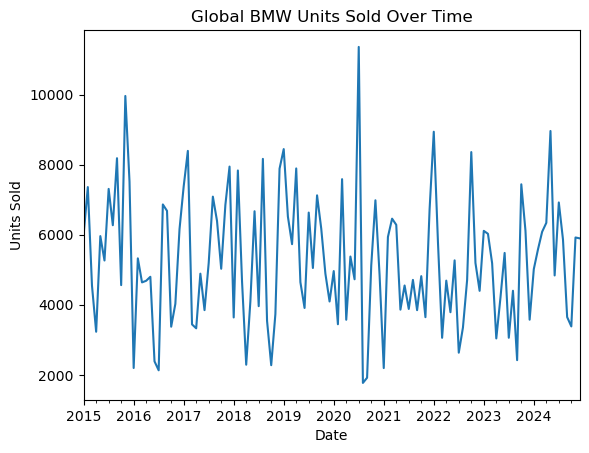

In [8]:
monthly_sales = data.groupby('date')['units_sold'].sum()

plt.figure()
monthly_sales.plot()
plt.title("Global BMW Units Sold Over Time")
plt.xlabel("Date")
plt.ylabel("Units Sold")
plt.show()

Shows the monthly evolution of total BMW units sold worldwide. The line trend helps identify growth patterns, seasonal fluctuations, and any sharp increases or declines in demand across the timeline.

### Units Sold by Country

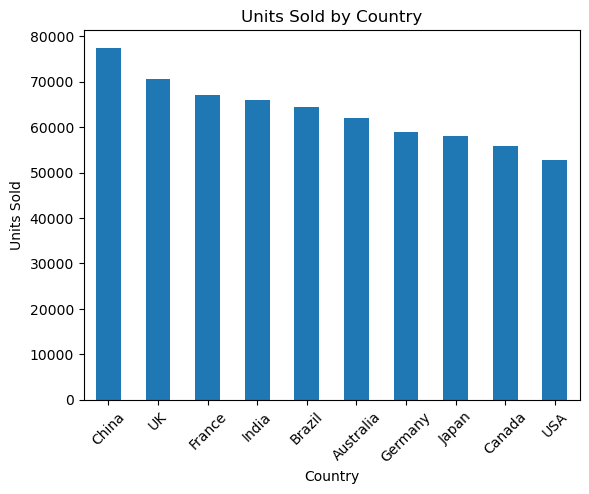

In [9]:
country_sales = data.groupby('country')['units_sold'].sum().sort_values(ascending=False)

plt.figure()
country_sales.plot(kind='bar')
plt.title("Units Sold by Country")
plt.xlabel("Country")
plt.ylabel("Units Sold")
plt.xticks(rotation=45)
plt.show()

Compares total vehicle sales across different countries. This chart highlights the strongest markets contributing to global volume and helps identify regions with high or underperforming demand.

### Sales by Segment

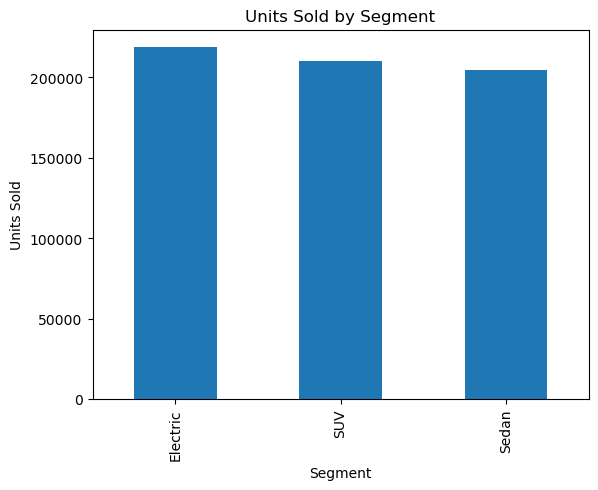

In [10]:
segment_sales = data.groupby('segment')['units_sold'].sum()

plt.figure()
segment_sales.plot(kind='bar')
plt.title("Units Sold by Segment")
plt.xlabel("Segment")
plt.ylabel("Units Sold")
plt.show()

Breaks down units sold by vehicle segment (SUV, Sedan, Luxury, etc.). It reveals which product categories dominate sales and indicates where customer demand is concentrated.

#### Engine Type Performance

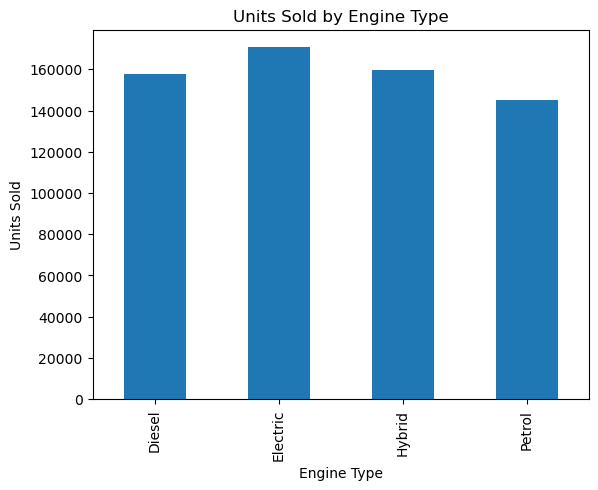

In [11]:
engine_sales = data.groupby('engine_type')['units_sold'].sum()

plt.figure()
engine_sales.plot(kind='bar')
plt.title("Units Sold by Engine Type")
plt.xlabel("Engine Type")
plt.ylabel("Units Sold")
plt.show()

Displays total sales by engine type. The comparison helps evaluate customer preference across fuel technologies and supports insights into market shifts toward specific engine categories.

#### Top 10 Models (Product Performance)

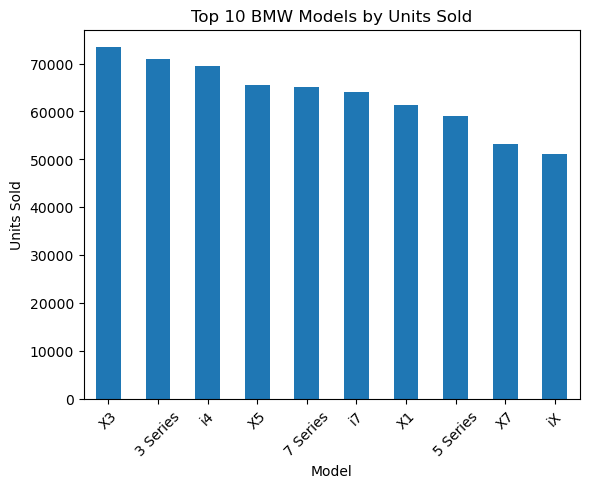

In [12]:
top_models = data.groupby('model')['units_sold'].sum().sort_values(ascending=False).head(10)

plt.figure()
top_models.plot(kind='bar')
plt.title("Top 10 BMW Models by Units Sold")
plt.xlabel("Model")
plt.ylabel("Units Sold")
plt.xticks(rotation=45)
plt.show()

Displays total sales by engine type. The comparison helps evaluate customer preference across fuel technologies and supports insights into market shifts toward specific engine categories.

#### Price vs Sales

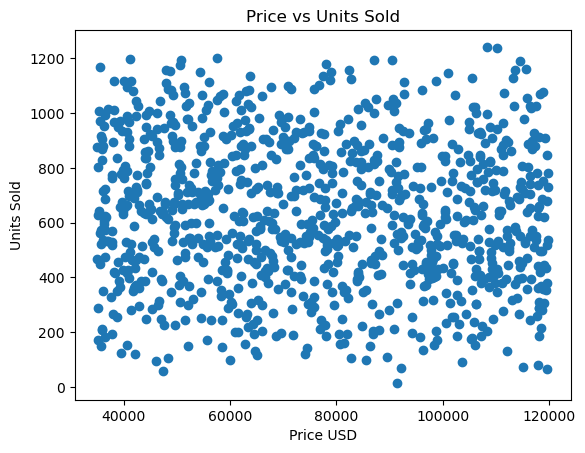

In [13]:
plt.figure()
plt.scatter(data['price_usd'], data['units_sold'])
plt.title("Price vs Units Sold")
plt.xlabel("Price USD")
plt.ylabel("Units Sold")
plt.show()

Visualizes the relationship between vehicle price and sales volume. It helps determine whether higher pricing reduces demand and identifies clusters of high-volume or premium models.

#### Marketing Spend vs Sales

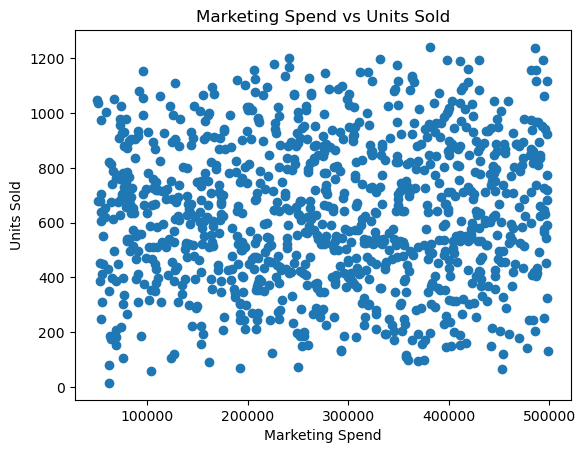

In [14]:
plt.figure()
plt.scatter(data['marketing_spend_usd'], data['units_sold'])
plt.title("Marketing Spend vs Units Sold")
plt.xlabel("Marketing Spend")
plt.ylabel("Units Sold")
plt.show()

Examines how marketing investment relates to sales performance. The spread of points indicates whether increased promotional spending correlates with higher units sold.

#### Dealership Count Impact

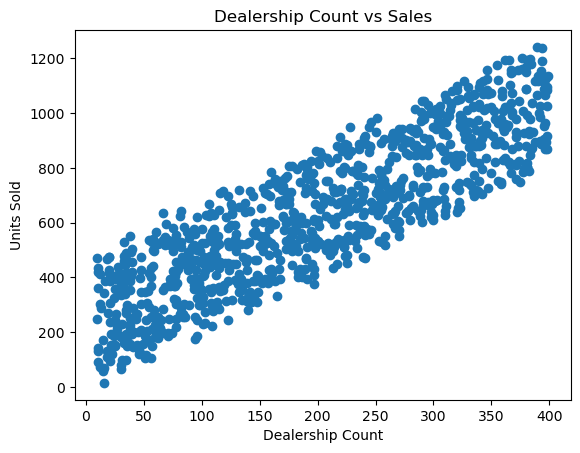

In [15]:
plt.figure()
plt.scatter(data['dealership_count'], data['units_sold'])
plt.title("Dealership Count vs Sales")
plt.xlabel("Dealership Count")
plt.ylabel("Units Sold")
plt.show()

Shows the relationship between distribution network size and sales volume. This graph helps assess whether markets with more dealerships tend to achieve stronger sales outcomes.

### EDA summary 

Performed exploratory data analysis on global BMW sales to evaluate trends across countries, segments, and engine types. Identified key markets and top-performing models driving the majority of unit sales and revenue. Analyzed relationships between price, marketing spend, dealership presence, and sales performance using statistical and visual methods. Time-series analysis highlighted overall sales patterns and demand fluctuations. Insights support data-driven decisions around product strategy, pricing, and market expansion.


## MODEL BUILDING

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [17]:
df = pd.read_csv("bmw_global_sales_dataset.csv")

df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   year                   1000 non-null   int64  
 1   month                  1000 non-null   int64  
 2   country                1000 non-null   object 
 3   model                  1000 non-null   object 
 4   segment                1000 non-null   object 
 5   engine_type            1000 non-null   object 
 6   price_usd              1000 non-null   int64  
 7   marketing_spend_usd    1000 non-null   int64  
 8   dealership_count       1000 non-null   int64  
 9   fuel_price_usd         1000 non-null   float64
 10  gdp_growth_percent     1000 non-null   float64
 11  interest_rate_percent  1000 non-null   float64
 12  competition_index      1000 non-null   int64  
 13  units_sold             1000 non-null   int64  
dtypes: float64(3), int64(7), object(4)
memory usage: 109.5+ K

In [19]:
df = df.drop_duplicates()

In [23]:
df['date'] = pd.to_datetime(
    df['year'].astype(str) + "-" + df['month'].astype(str) + "-01"
)

In [24]:
y = df['units_sold']

In [28]:
X = df.drop(columns=['units_sold', 'date'])

In [29]:
X = pd.get_dummies(X, drop_first=True)

In [30]:
X.head()

,year,month,price_usd,marketing_spend_usd,dealership_count,fuel_price_usd,gdp_growth_percent,interest_rate_percent,competition_index,country_Brazil,...,model_X5,model_X7,model_i4,model_i7,model_iX,segment_SUV,segment_Sedan,engine_type_Electric,engine_type_Hybrid,engine_type_Petrol
0,2021,1,82234,315372,96,0.97,6.29,1.2,8,False,...,False,False,False,False,False,True,False,False,False,True
1,2018,8,82291,447798,234,0.97,6.29,1.2,7,False,...,False,False,True,False,False,False,True,True,False,False
2,2022,12,40594,259755,25,0.97,6.29,1.2,7,False,...,False,False,False,False,False,False,False,False,True,False
3,2019,11,42371,323541,319,0.97,6.29,1.2,5,False,...,False,False,False,True,False,True,False,True,False,False
4,2021,12,82315,482015,367,0.97,6.29,1.2,2,True,...,True,False,False,False,False,True,False,False,False,False


In [31]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

###  First Model Linear Regression

In [32]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [39]:
lr_pred = lr.predict(X_test)

In [41]:
mae = mean_absolute_error(y_test, lr_pred)
rmse = mean_squared_error(y_test, lr_pred)
r2 = r2_score(y_test, lr_pred)

print("Linear Regression Results")
print("MAE:", mae)
print("RMSE:", rmse)
print("R2:", r2)

Linear Regression Results
MAE: 112.36319234753836
RMSE: 17271.225757627955
R2: 0.7473317111206244


### Actual vs Predicted Graph

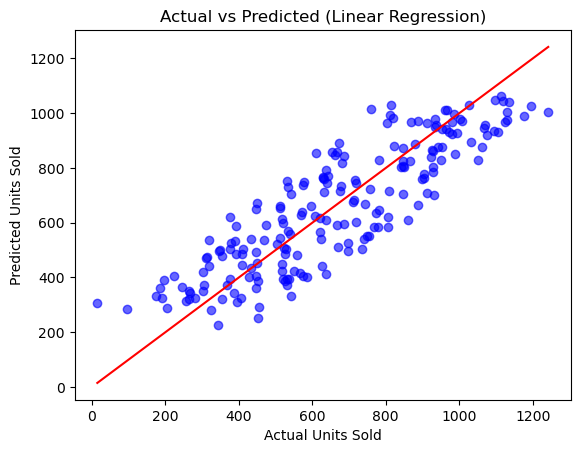

In [44]:
plt.figure()

plt.scatter(y_test, lr_pred, color='blue', alpha=0.6)

# perfect prediction line
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    color='red'
)

plt.xlabel("Actual Units Sold")
plt.ylabel("Predicted Units Sold")
plt.title("Actual vs Predicted (Linear Regression)")
plt.show()

### SECOND MODEL RANDOM FOREST

In [45]:
rf = RandomForestRegressor(
    n_estimators=200,
    random_state=42
)

rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=42)

In [46]:
rf_pred = rf.predict(X_test)

In [48]:
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_rmse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

print("Random Forest Results")
print("MAE:", rf_mae)
print("RMSE:", rf_rmse)
print("R2:", rf_r2)

Random Forest Results
MAE: 112.1679
RMSE: 17719.983156000002
R2: 0.7407666435591314


### Random Forest — Actual vs Predicted Graph

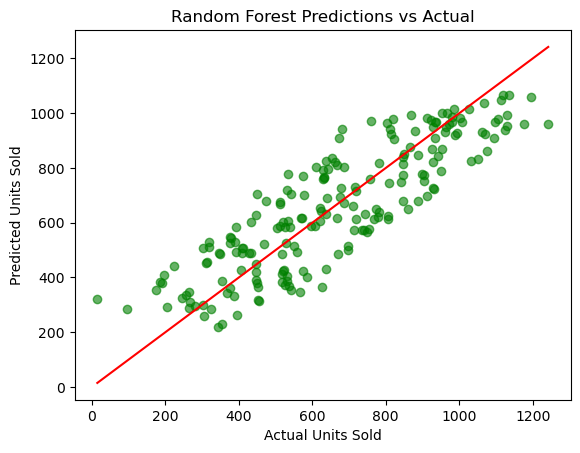

In [51]:
plt.figure()

plt.scatter(y_test, rf_pred, color='green', alpha=0.6)

# perfect prediction reference line
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    color='red'
)

plt.xlabel("Actual Units Sold")
plt.ylabel("Predicted Units Sold")
plt.title("Random Forest Predictions vs Actual")
plt.show()

### Feature Importance

In [49]:
importance = pd.Series(
    rf.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

importance.head(10)

dealership_count        0.795831
price_usd               0.040849
marketing_spend_usd     0.038474
competition_index       0.019467
month                   0.019123
year                    0.016653
engine_type_Petrol      0.005113
engine_type_Electric    0.004574
segment_SUV             0.003639
country_UK              0.003571
dtype: float64

### Feature Importance Graph

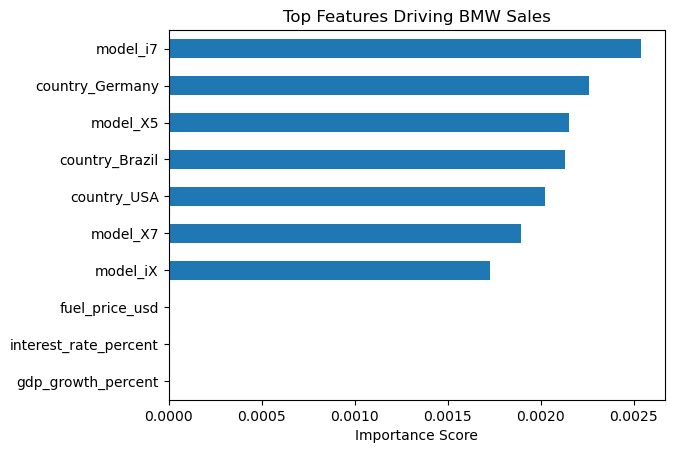

In [56]:
plt.figure()

importance.sort_values(ascending=True).head(10).plot(kind='barh')

plt.title("Top Features Driving BMW Sales")
plt.xlabel("Importance Score")
plt.show()

### Decision Tree Regressor

In [57]:
from sklearn.tree import DecisionTreeRegressor

In [58]:
dt = DecisionTreeRegressor(
    max_depth=6,     # prevents overfitting
    random_state=42
)

dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=6, random_state=42)

In [59]:
dt_pred = dt.predict(X_test)

In [60]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

dt_mae = mean_absolute_error(y_test, dt_pred)
dt_rmse = np.sqrt(mean_squared_error(y_test, dt_pred))
dt_r2 = r2_score(y_test, dt_pred)

print("Decision Tree Results")
print("MAE:", dt_mae)
print("RMSE:", dt_rmse)
print("R2:", dt_r2)

Decision Tree Results
MAE: 126.44357526342559
RMSE: 153.77529745742248
R2: 0.6540600408618757


#### Decision Tree Graph (Actual vs Predicted)

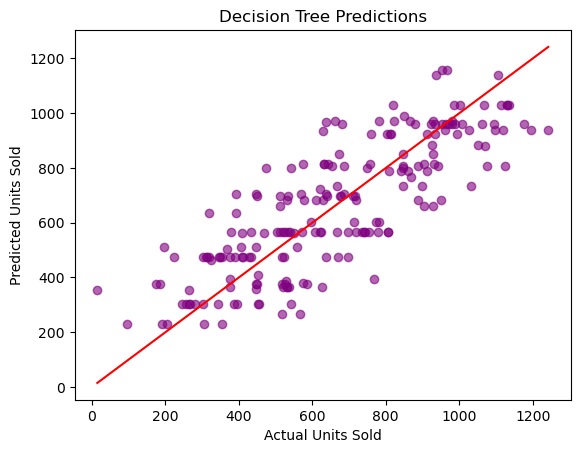

In [61]:
plt.figure()

plt.scatter(y_test, dt_pred, color='purple', alpha=0.6)

plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    color='red'
)

plt.xlabel("Actual Units Sold")
plt.ylabel("Predicted Units Sold")
plt.title("Decision Tree Predictions")
plt.show()

### Gradient Boosting Regressor

In [63]:
from sklearn.ensemble import GradientBoostingRegressor

In [64]:
gb = GradientBoostingRegressor(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=4,
    random_state=42
)

gb.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.05, max_depth=4, n_estimators=200,
                          random_state=42)

In [65]:
gb_pred = gb.predict(X_test)

In [66]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

gb_mae = mean_absolute_error(y_test, gb_pred)
gb_rmse = np.sqrt(mean_squared_error(y_test, gb_pred))
gb_r2 = r2_score(y_test, gb_pred)

print("Gradient Boosting Results")
print("MAE:", gb_mae)
print("RMSE:", gb_rmse)
print("R2:", gb_r2)

Gradient Boosting Results
MAE: 115.17289405302493
RMSE: 137.49638185303465
R2: 0.7234267848477427


#### Gradient Boosting Graph

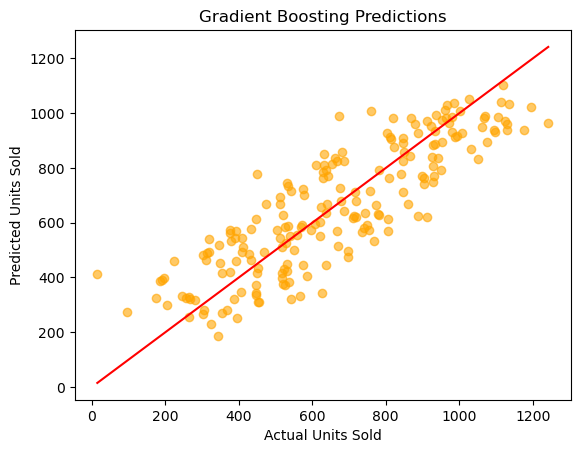

In [67]:
plt.figure()

plt.scatter(y_test, gb_pred, color='orange', alpha=0.6)

plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    color='red'
)

plt.xlabel("Actual Units Sold")
plt.ylabel("Predicted Units Sold")
plt.title("Gradient Boosting Predictions")
plt.show()

### Compare All Models

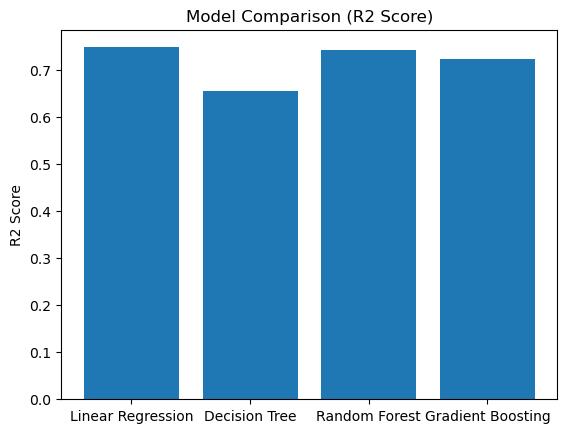

In [68]:
models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting']
scores = [r2, dt_r2, rf_r2, gb_r2]

plt.figure()
plt.bar(models, scores)

plt.title("Model Comparison (R2 Score)")
plt.ylabel("R2 Score")
plt.show()

### Model Comparison Table

In [71]:
comparison = pd.DataFrame({
    "Model": [
        "Linear Regression",
        "Decision Tree",
        "Random Forest",
        "Gradient Boosting"
    ],
    "MAE": [
        mae,
        dt_mae,
        rf_mae,
        gb_mae
    ],
    "RMSE": [
        rmse,
        dt_rmse,
        rf_rmse,
        gb_rmse
    ],
    "R2 Score": [
        r2,
        dt_r2,
        rf_r2,
        gb_r2
    ]
})

comparison
comparison = comparison.sort_values(by="R2 Score", ascending=False)
comparison
comparison.round(3)

,Model,MAE,RMSE,R2 Score
0,Linear Regression,112.363,17271.226,0.747
2,Random Forest,112.168,17719.983,0.741
3,Gradient Boosting,115.173,137.496,0.723
1,Decision Tree,126.444,153.775,0.654


Linear Regression performed best with the highest R² score, indicating strong predictive capability for units sold. Tree-based models showed competitive performance, but ensemble methods did not significantly outperform the baseline model, suggesting the dataset follows relatively linear relationships.